<a href="https://colab.research.google.com/github/noobcoder1982/App/blob/main/pythonlab%5B25th%20aug%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
df = pd.read_csv('/Iris.csv')

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.shape


(150, 6)

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
# Label Encoding
label_encoder = LabelEncoder()
df['Species_encoded'] = label_encoder.fit_transform(df['Species'])
# One-Hot Encoding
onehot_encoder = OneHotEncoder()
species_encoded = onehot_encoder.fit_transform(df['Species'].values.reshape(-1, 1)).toarray()
species_df = pd.DataFrame(species_encoded, columns=['Species_' + str(i) for i in range(species_encoded.shape[1])])
df = pd.concat([df, species_df], axis=1)
# Display the modified DataFrame
print(df.head())

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


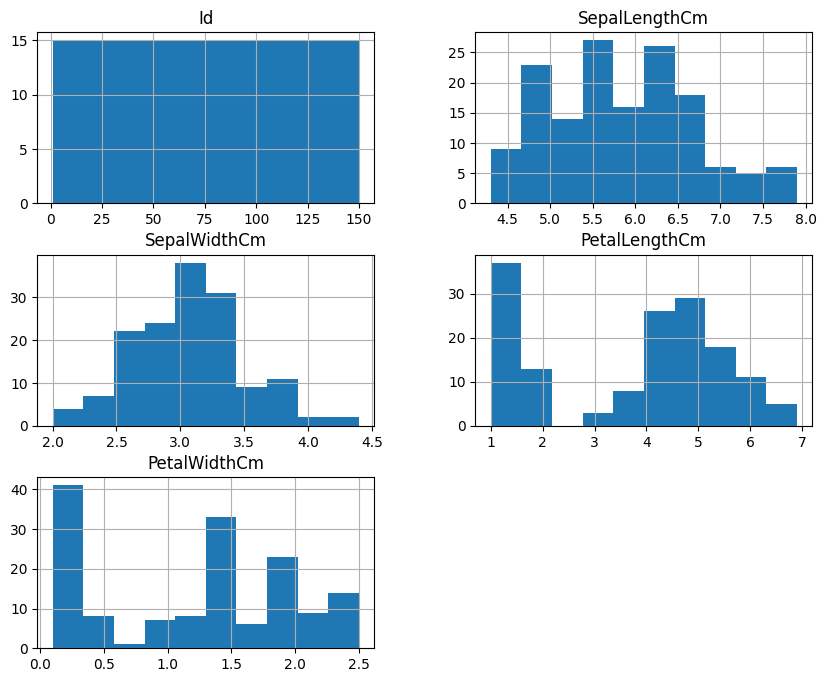

In [15]:
import matplotlib.pyplot as plt
 #histogram
df.hist(figsize=(10, 8))
plt.show()

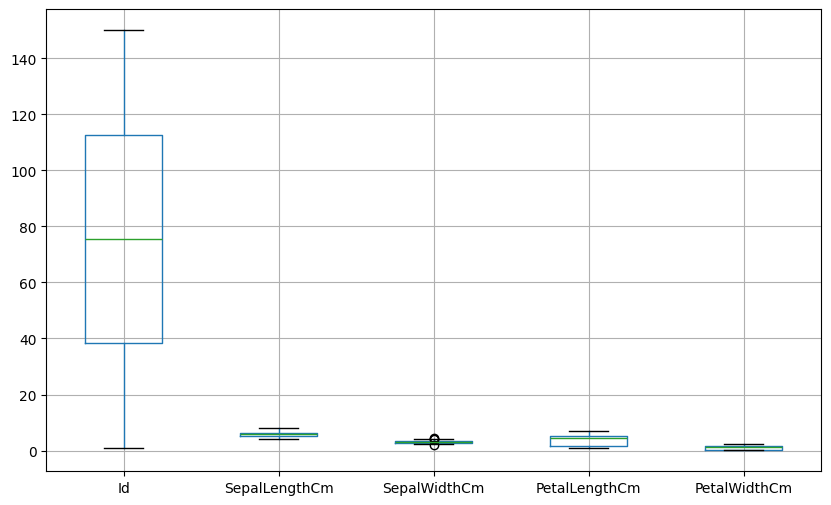

In [16]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(10,6))
plt.show()

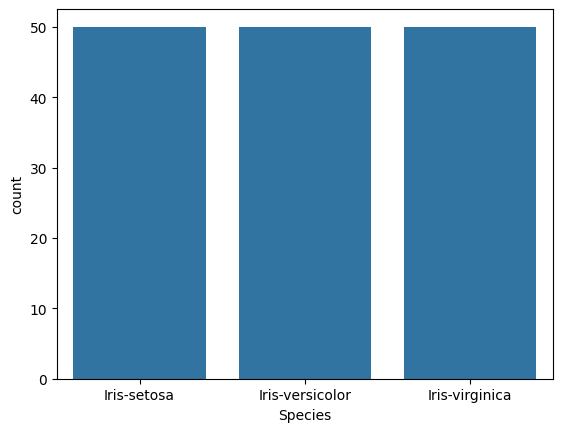

In [17]:
import seaborn as sns
sns.countplot(x='Species', data=df)
plt.show()

In [30]:
print(df.isnull().sum())
print(df.dtypes)

numeric_cols = df.select_dtypes(include=['number']).columns
non_numberic_cols = df.select_dtypes(exclude=['number']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

for col in non_numberic_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())

df.dropna(inplace=True)

Id                 0
SepalLengthCm      0
SepalWidthCm       0
PetalLengthCm      0
PetalWidthCm       0
Species            0
Species_encoded    0
dtype: int64
Id                   int64
SepalLengthCm      float64
SepalWidthCm       float64
PetalLengthCm      float64
PetalWidthCm       float64
Species             object
Species_encoded      int64
dtype: object
Id                 0
SepalLengthCm      0
SepalWidthCm       0
PetalLengthCm      0
PetalWidthCm       0
Species            0
Species_encoded    0
dtype: int64


In [31]:
from sklearn.preprocessing import StandardScaler
# Select numeric columns for scaling
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# Create a scaler object
scaler = StandardScaler()
# Fit and transform the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
# Display the scaled DataFrame
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1      -0.900681      1.032057      -1.341272     -1.312977  Iris-setosa   
1   2      -1.143017     -0.124958      -1.341272     -1.312977  Iris-setosa   
2   3      -1.385353      0.337848      -1.398138     -1.312977  Iris-setosa   
3   4      -1.506521      0.106445      -1.284407     -1.312977  Iris-setosa   
4   5      -1.021849      1.263460      -1.341272     -1.312977  Iris-setosa   

   Species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [32]:
from sklearn.model_selection import train_test_split
# Assuming 'Species_encoded' is your target variable
X = df.drop(['Species', 'Species_encoded'], axis=1)
y = df['Species_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 5)
X_test shape: (30, 5)
y_train shape: (120,)
y_test shape: (30,)


In [36]:
import pandas as pd
# Example of converting DataFrame to NumPy array
if isinstance(X_train, pd.DataFrame) or isinstance(X_train, pd.Series):
  X_train = X_train.to_numpy()
if isinstance(X_test, pd.DataFrame) or isinstance(X_test, pd.Series):
  X_test = X_test.to_numpy()
if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
  y_train = y_train.to_numpy()
if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
  y_test = y_test.to_numpy()
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
